# **THE SPARKS FOUNDATION**

# **TASK 2: PREDICTION USING UNSUPERVISED ML**

From the given ‘Iris’ dataset, predict the optimum number of clusters
and represent it visually.

**AUTHOR: RHEA CHAWLA**

DATASET: https://bit.ly/3kXTdox

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets

In [28]:
iris=datasets.load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# **Exploring the Data**

In [29]:
data.shape

(150, 4)

In [30]:
data.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [32]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## **Finding Optimum number of Clusters**

In [33]:
from sklearn.cluster import KMeans

In [34]:
X = data.iloc[:, [0,1,2,3]].values

In [35]:
def findingclusters(num_clusters, inertias):
    plt.plot(num_clusters, inertias)
    plt.title("Finding Optimum number of Clusters")
    plt.xlabel("Number of Clusters")
    plt.ylabel("Inertias")
    plt.show()

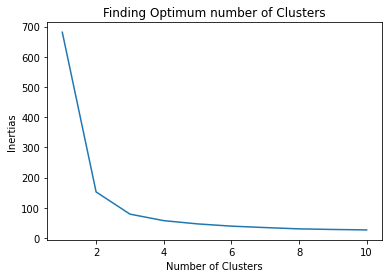

In [36]:
inertias = []
clusters = range(1,11)

for i in clusters:
    kmeans = KMeans(n_clusters = i, init='k-means++',  max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)
findingclusters(clusters, inertias)

The Elbow Method is used to find the Optimum Number of Clusters i.e. the optimum clusters is present where the elbow occurs. This happens when WCSS do not decrease significantly with each and every iteration.

**OBSERVATION:** From the above plot we can observe that the optimum number of clusters can be chosen as "3".

In [37]:
kmeans = KMeans(n_clusters = 3, init='k-means++',  max_iter = 300, n_init = 10, random_state = 0)

y_kmeans = kmeans.fit_predict(X)

## **Visualization of the Cluster Data**

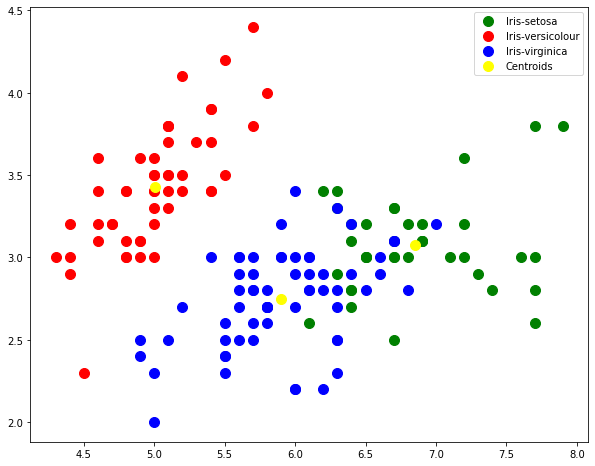

In [38]:
plt.figure(figsize = (10,8))

# Visualising the clusters - On the first two columns
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], 
            s = 100, c = 'green', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], 
            s = 100, c = 'red', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1],
            s = 100, c = 'blue', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

plt.show()